# Evaluate treatment propensity models

In [2]:
import treatment_propensity_models
import importlib
import evaluation_help_functions

In [80]:
importlib.reload(treatment_propensity_models)
importlib.reload(evaluation_help_functions)

<module 'evaluation_help_functions' from '/Users/lovhag/Projects/yelp_causal_inference/evaluation_help_functions.py'>

## Get the treatment propensity models

In [81]:
models = {"baseline_model": treatment_propensity_models.get_baseline_model(), 
        "random_forest_model_1": treatment_propensity_models.get_random_forest_model_1()}

## Evaluate the models with cross validation for the test data

Data loaded! Loaded data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10114 entries, 0 to 10113
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                10114 non-null  object 
 1   business_id            10114 non-null  object 
 2   stars                  10114 non-null  int64  
 3   useful                 10114 non-null  int64  
 4   text                   10114 non-null  object 
 5   date                   10114 non-null  object 
 6   text_length            10114 non-null  int64  
 7   nbr_words              10114 non-null  int64  
 8   lemmatized_text        10114 non-null  object 
 9   processed_text         10114 non-null  object 
 10  test                   10114 non-null  int64  
 11  Z1                     10114 non-null  int64  
 12  Z2                     10114 non-null  int64  
 13  Z3                     10114 non-null  int64  
 14  is_positive_sentiment  

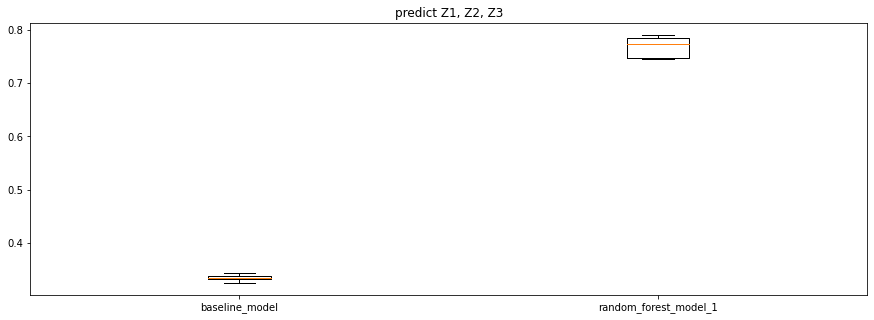

In [82]:
X_cols = ['is_positive_sentiment', 'n_words', 'n_fans', 'n_reviews']
Y_cols = ['Z1','Z2', 'Z3']
df = evaluation_help_functions.get_pandas_data('saved_data/data_features_interpretable.csv')
X_data = df[df.test==1][X_cols].to_numpy()
Y_data = df[df.test==1][Y_cols]
score_dict = evaluation_help_functions.get_treatment_model_crossval_scores_basic(models, X_data, Y_data)
evaluation_help_functions.plot_model_scores(score_dict, "predict Z1, Z2, Z3")

## Get classification reports for the models

In [83]:
X_cols = ['is_positive_sentiment', 'n_words', 'n_fans', 'n_reviews']
Y_cols = ['Z1','Z2', 'Z3']
df = evaluation_help_functions.get_pandas_data('saved_data/data_features_interpretable.csv')
X_data = df[df.test==1][X_cols].to_numpy()
Y_data = df[df.test==1][Y_cols].to_numpy()
predictions_dict = evaluation_help_functions.get_treatment_model_crossval_predictions_basic(models, X_data, Y_data)

Data loaded! Loaded data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10114 entries, 0 to 10113
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                10114 non-null  object 
 1   business_id            10114 non-null  object 
 2   stars                  10114 non-null  int64  
 3   useful                 10114 non-null  int64  
 4   text                   10114 non-null  object 
 5   date                   10114 non-null  object 
 6   text_length            10114 non-null  int64  
 7   nbr_words              10114 non-null  int64  
 8   lemmatized_text        10114 non-null  object 
 9   processed_text         10114 non-null  object 
 10  test                   10114 non-null  int64  
 11  Z1                     10114 non-null  int64  
 12  Z2                     10114 non-null  int64  
 13  Z3                     10114 non-null  int64  
 14  is_positive_sentiment  

In [84]:
def categorize_y_vals(y_vals):
    categorized_y = []
    for y_val in y_vals:
        categorized_y.append(np.where(np.all(Y_categorical==y_val, axis=1))[0].item())

    return categorized_y

In [85]:
from sklearn.metrics import classification_report
target_names = [str(val) for val in Y_categorical]

for model_name, model in models.items():
    print(f"CLASSIFICATION REPORT {model_name}")
    print(classification_report(categorize_y_vals(Y_data), categorize_y_vals(predictions_dict[model_name]), target_names=target_names))
    print("===========================================")

CLASSIFICATION REPORT baseline_model
              precision    recall  f1-score   support

     [0 0 0]       0.31      0.31      0.31      2542
     [0 0 1]       0.02      0.03      0.02       159
     [0 1 0]       0.47      0.45      0.46      3900
     [0 1 1]       0.02      0.03      0.03       269
     [1 0 0]       0.03      0.03      0.03       468
     [1 0 1]       0.05      0.01      0.02       175
     [1 1 0]       0.07      0.09      0.08       527
     [1 1 1]       0.02      0.02      0.02        53

    accuracy                           0.32      8093
   macro avg       0.12      0.12      0.12      8093
weighted avg       0.33      0.32      0.33      8093

CLASSIFICATION REPORT random_forest_model_1
              precision    recall  f1-score   support

     [0 0 0]       0.73      0.80      0.77      2542
     [0 0 1]       0.26      0.06      0.10       159
     [0 1 0]       0.87      0.92      0.90      3900
     [0 1 1]       0.07      0.00      0.01       2

## Get treatment probabilities for all x

In [105]:
import pandas as pd

In [103]:
df[df.test==1][X_cols].describe()

,is_positive_sentiment,n_words,n_fans,n_reviews
count,8093.000000,8093.000000,8093.000000,8093.000000
mean,0.640554,139.994687,16.087977,159.807364
std,0.479868,129.970251,56.368684,317.321461
min,0.000000,1.000000,0.000000,1.000000
25%,0.000000,52.000000,0.000000,15.000000
50%,1.000000,99.000000,1.000000,51.000000
75%,1.000000,185.000000,9.000000,168.000000
max,1.000000,975.000000,1464.000000,7745.000000


In [93]:
df[df.test==1].groupby(X_cols).user_id.count()

is_positive_sentiment  n_words  n_fans  n_reviews
0.0                    1        0       1            1
                                        29           1
                                1       94           1
                       5        0       1            2
                                        3            1
                                                    ..
1.0                    883      0       12           1
                       886      1       6            1
                       922      3       72           1
                       923      44      638          1
                       937      0       15           1
Name: user_id, Length: 7636, dtype: int64

Number of unique contexts

In [97]:
len(df[df.test==1].groupby(X_cols).user_id.count())

7636

### Get prediction probabilities for all treatments

In [127]:
from sklearn.model_selection import cross_val_predict

X_cols = ['is_positive_sentiment', 'n_words', 'n_fans', 'n_reviews']
Y_cols = ['Z1','Z2', 'Z3']
df = evaluation_help_functions.get_pandas_data('saved_data/data_features_interpretable.csv')
X_data = df[df.test==1][X_cols]
Y_data = df[df.test==1][Y_cols]

pred_prob_dict = {}
for model_name, model in models.items():
    pred_prob_dict[model_name] = cross_val_predict(model, X_data.to_numpy(), Y_data.to_numpy(), cv=5, method='predict_proba')

Data loaded! Loaded data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10114 entries, 0 to 10113
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                10114 non-null  object 
 1   business_id            10114 non-null  object 
 2   stars                  10114 non-null  int64  
 3   useful                 10114 non-null  int64  
 4   text                   10114 non-null  object 
 5   date                   10114 non-null  object 
 6   text_length            10114 non-null  int64  
 7   nbr_words              10114 non-null  int64  
 8   lemmatized_text        10114 non-null  object 
 9   processed_text         10114 non-null  object 
 10  test                   10114 non-null  int64  
 11  Z1                     10114 non-null  int64  
 12  Z2                     10114 non-null  int64  
 13  Z3                     10114 non-null  int64  
 14  is_positive_sentiment  

In [123]:
model_prob_results = {}
for model_name in models:
    prob_results = {}
    for index, col in enumerate(Y_cols):
        prob_results[col+"_0"] = []
        prob_results[col+"_1"] = []
        for preds in pred_prob_dict[model_name][index]:
            prob_results[col+"_0"].append(preds[0])
            prob_results[col+"_1"].append(preds[1])
    model_prob_results[model_name] = pd.DataFrame(prob_results)

In [165]:
model_results = pd.concat([model_prob_results['random_forest_model_1'], X_data.reset_index(drop=True)], axis=1)
model_results.head()

,Z1_0,Z1_1,Z2_0,Z2_1,Z3_0,Z3_1,is_positive_sentiment,n_words,n_fans,n_reviews
0,0.840667,0.159333,0.810476,0.189524,0.963143,0.036857,1.0,176,0,3
1,0.000000,1.000000,0.857022,0.142978,0.124606,0.875394,0.0,940,330,1224
2,0.992500,0.007500,0.973738,0.026262,1.000000,0.000000,1.0,131,113,1864
3,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.0,63,0,15
4,0.670707,0.329293,0.519563,0.480437,0.846356,0.153644,1.0,216,0,8


### Bin the X data in order to get different X regions to check T predict probabilities for

In [166]:
standard_nbr_bins = 100
n_bins = {"is_positive_sentiment": 2, "n_words": standard_nbr_bins, "n_fans": standard_nbr_bins, "n_reviews": standard_nbr_bins}

X_cols_binned = []
for col in X_cols:
    col_name = col+"_binned"
    X_cols_binned.append(col_name)
    model_results[col_name] = pd.cut(model_results[col], n_bins[col])
model_results.head()

,Z1_0,Z1_1,Z2_0,Z2_1,Z3_0,Z3_1,is_positive_sentiment,n_words,n_fans,n_reviews,is_positive_sentiment_binned,n_words_binned,n_fans_binned,n_reviews_binned
0,0.840667,0.159333,0.810476,0.189524,0.963143,0.036857,1.0,176,0,3,"(0.5, 1.0]","(166.58, 176.32]","(-1.464, 14.64]","(-6.744, 78.44]"
1,0.000000,1.000000,0.857022,0.142978,0.124606,0.875394,0.0,940,330,1224,"(-0.001, 0.5]","(936.04, 945.78]","(322.08, 336.72]","(1162.6, 1240.04]"
2,0.992500,0.007500,0.973738,0.026262,1.000000,0.000000,1.0,131,113,1864,"(0.5, 1.0]","(127.62, 137.36]","(102.48, 117.12]","(1859.56, 1937.0]"
3,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.0,63,0,15,"(0.5, 1.0]","(59.44, 69.18]","(-1.464, 14.64]","(-6.744, 78.44]"
4,0.670707,0.329293,0.519563,0.480437,0.846356,0.153644,1.0,216,0,8,"(0.5, 1.0]","(215.28, 225.02]","(-1.464, 14.64]","(-6.744, 78.44]"


In [169]:
grouped_model_results = model_results.drop(columns=X_cols).groupby(X_cols_binned, observed=True).mean()
grouped_model_results

Z1_0  \
is_positive_sentiment_binned n_words_binned   n_fans_binned   n_reviews_binned             
(-0.001, 0.5]                (0.026, 10.74]   (-1.464, 14.64] (-6.744, 78.44]   1.000000   
                                                              (78.44, 155.88]   1.000000   
                             (10.74, 20.48]   (-1.464, 14.64] (-6.744, 78.44]   1.000000   
                                                              (78.44, 155.88]   1.000000   
                                                              (155.88, 233.32]  1.000000   
...                                                                                  ...   
(0.5, 1.0]                   (858.12, 867.86] (-1.464, 14.64] (-6.744, 78.44]   0.075810   
                             (877.6, 887.34]  (-1.464, 14.64] (-6.744, 78.44]   0.041960   
                             (916.56, 926.3]  (-1.464, 14.64] (-6.744, 78.44]   0.034968   
                                              (43.92, 58.56]  (620.52, 697.96]  0.011333   
                             (936.04, 945.78] (-1.464, 14.64] (-6.744, 78.44]   0.079357   

                                                                                    Z1_1  \
is_positive_sentiment_binned n_words_binned   n_fans_binned   n_reviews_binned             
(-0.001, 0.5]                (0.026, 10.74]   (-1.464, 14.64] (-6.744, 78.44]   0.000000   
                                                              (78.44, 155.88]   0.000000   
                             (10.74, 20.48]   (-1.464, 14.64] (-6.744, 78.44]   0.000000   
                                                              (78.44, 155.88]   0.000000   
                                                              (155.88, 233.32]  0.000000   
...                                                                                  ...   
(0.5, 1.0]                   (858.12, 867.86] (-1.464, 14.64] (-6.744, 78.44]   0.924190   
                             (877.6, 887.34]  (-1.464, 14.64] (-6.744, 78.44]   0.958040   
                             (916.56, 926.3]  (-1.464, 14.64] (-6.744, 78.44]   0.965032   
                                              (43.92, 58.56]  (620.52, 697.96]  0.988667   
                             (936.04, 945.78] (-1.464, 14.64] (-6.744, 78.44]   0.920643   

                                                                                    Z2_0  \
is_positive_sentiment_binned n_words_binned   n_fans_binned   n_reviews_binned             
(-0.001, 0.5]                (0.026, 10.74]   (-1.464, 14.64] (-6.744, 78.44]   0.000000   
                                                              (78.44, 155.88]   0.014444   
                             (10.74, 20.48]   (-1.464, 14.64] (-6.744, 78.44]   0.000415   
                                                              (78.44, 155.88]   0.010000   
                                                              (155.88, 233.32]  0.012500   
...                                                                                  ...   
(0.5, 1.0]                   (858.12, 867.86] (-1.464, 14.64] (-6.744, 78.44]   0.903611   
                             (877.6, 887.34]  (-1.464, 14.64] (-6.744, 78.44]   0.938143   
                             (916.56, 926.3]  (-1.464, 14.64] (-6.744, 78.44]   0.928286   
                                              (43.92, 58.56]  (620.52, 697.96]  0.967619   
                             (936.04, 945.78] (-1.464, 14.64] (-6.744, 78.44]   0.934460   

                                                                                    Z2_1  \
is_positive_sentiment_binned n_words_binned   n_fans_binned   n_reviews_binned             
(-0.001, 0.5]                (0.026, 10.74]   (-1.464, 14.64] (-6.744, 78.44]   1.000000   
                                                              (78.44, 155.88]   0.985556   
                             (10.74, 20.48]   (-1.464, 14.64] (-6.744, 78.44]   0.999585   
                                 

### Extract X regions for which the model is super certain

In [176]:
eps = 0.00001
grouped_model_results[((grouped_model_results.Z1_0 == 0) | (grouped_model_results.Z1_0 == 1)) & ((grouped_model_results.Z2_0 == 0) | (grouped_model_results.Z2_0 == 1)) & ((grouped_model_results.Z3_0 == 0) | (grouped_model_results.Z3_0 == 1))]

Z1_0  \
is_positive_sentiment_binned n_words_binned n_fans_binned   n_reviews_binned         
(-0.001, 0.5]                (0.026, 10.74] (-1.464, 14.64] (-6.744, 78.44]    1.0   
                             (20.48, 30.22] (-1.464, 14.64] (233.32, 310.76]   1.0   
                             (30.22, 39.96] (-1.464, 14.64] (310.76, 388.2]    1.0   
                             (39.96, 49.7]  (-1.464, 14.64] (310.76, 388.2]    1.0   
                             (49.7, 59.44]  (-1.464, 14.64] (388.2, 465.64]    1.0   
(0.5, 1.0]                   (10.74, 20.48] (-1.464, 14.64] (155.88, 233.32]   1.0   
                                            (14.64, 29.28]  (78.44, 155.88]    1.0   
                                            (43.92, 58.56]  (388.2, 465.64]    1.0   
                             (20.48, 30.22] (14.64, 29.28]  (388.2, 465.64]    1.0   
                                                            (620.52, 697.96]   1.0   
                             (30.22, 39.96] (-1.464, 14.64] (388.2, 465.64]    1.0   
                                            (14.64, 29.28]  (310.76, 388.2]    1.0   
                                            (29.28, 43.92]  (543.08, 620.52]   1.0   
                             (39.96, 49.7]  (14.64, 29.28]  (155.88, 233.32]   1.0   
                                            (29.28, 43.92]  (465.64, 543.08]   1.0   

                                                                              Z1_1  \
is_positive_sentiment_binned n_words_binned n_fans_binned   n_reviews_binned         
(-0.001, 0.5]                (0.026, 10.74] (-1.464, 14.64] (-6.744, 78.44]    0.0   
                             (20.48, 30.22] (-1.464, 14.64] (233.32, 310.76]   0.0   
                             (30.22, 39.96] (-1.464, 14.64] (310.76, 388.2]    0.0   
                             (39.96, 49.7]  (-1.464, 14.64] (310.76, 388.2]    0.0   
                             (49.7, 59.44]  (-1.464, 14.64] (388.2, 465.64]    0.0   
(0.5, 1.0]                   (10.74, 20.48] (-1.464, 14.64] (155.88, 233.32]   0.0   
                                            (14.64, 29.28]  (78.44, 155.88]    0.0   
                                            (43.92, 58.56]  (388.2, 465.64]    0.0   
                             (20.48, 30.22] (14.64, 29.28]  (388.2, 465.64]    0.0   
                                                            (620.52, 697.96]   0.0   
                             (30.22, 39.96] (-1.464, 14.64] (388.2, 465.64]    0.0   
                                            (14.64, 29.28]  (310.76, 388.2]    0.0   
                                            (29.28, 43.92]  (543.08, 620.52]   0.0   
                             (39.96, 49.7]  (14.64, 29.28]  (155.88, 233.32]   0.0   
                                            (29.28, 43.92]  (465.64, 543.08]   0.0   

                                                                              Z2_0  \
is_positive_sentiment_binned n_words_binned n_fans_binned   n_reviews_binned         
(-0.001, 0.5]                (0.026, 10.74] (-1.464, 14.64] (-6.744, 78.44]    0.0   
                             (20.48, 30.22] (-1.464, 14.64] (233.32, 310.76]   0.0   
                             (30.22, 39.96] (-1.464, 14.64] (310.76, 388.2]    0.0   
                             (39.96, 49.7]  (-1.464, 14.64] (310.76, 388.2]    0.0   
                             (49.7, 59.44]  (-1.464, 14.64] (388.2, 465.64]    0.0   
(0.5, 1.0]                   (10.74, 20.48] (-1.464, 14.64] (155.88, 233.32]   0.0   
                                            (14.64, 29.28]  (78.44, 155.88]    0.0   
                                            (43.92, 58.56]  (388.2, 465.64]    0.0   
                             (20.48, 30.22] (14.64, 29.28]  (388.2, 465.64]    0.0   
                                                            (620.52, 697.96]   0.0   
                             (30.22, 39.96] (-1.464, 14.64] (388.2, 465.64]    0.0   
                                  